# Exercise 1e Ploting the phase portrait

In [1]:
from sympy import *

#### First, lets write again our differential equations and solve the insulin and glucose lines:

In [2]:
m,s,I,G,B,gamma = symbols('m,s,I,G,B,gamma',positive=True)
fG              = Function('f')(G)

dG              = m     - s*I*G
dI              = B*fG - gamma*I

glucose_line    = solve(dG,I)[0]  
insulin_line    = solve(dI,I)[0]  

### See the example below to use '.subs()' in order to replace $f(G)$ with any other expression:


Here, I make a symbolic expression for our simple approximation, and store it in the varible 'simple_g'

In [3]:
q        = symbols('q',positive=True)  
simple_g = q*G    
display(simple_g)

G*q

Here, I make a symbolic expression for Hill function, and store it in the varible 'hill_g'

In [4]:
n,k    = symbols('n,k',positive=True)  
hill_g = q*G**n/(k**n + G**n)     
display(hill_g)

G**n*q/(G**n + k**n)

#### The insulin line is:

In [5]:
display(insulin_line)

B*f(G)/gamma

#### Using .subs(), we can replace $f(G)$  with any other expression without rewrting insulin equation:

In [6]:
display(insulin_line.subs(fG,simple_g))

B*G*q/gamma

In [7]:
display(insulin_line.subs(fG,hill_g))

B*G**n*q/(gamma*(G**n + k**n))

### The function below plots the phase portrait

In [8]:
import numpy as np
from matplotlib import pyplot as plt

def plot_GI_phase_portrait(G_line,I_line,parameters,ls='-'):
    with np.errstate(divide='ignore'): # supress warnning due to division by zero

        G_w_pars = G_line.subs(parameters)
        I_w_pars = I_line.subs(parameters)
        G_func   = lambdify(G,G_w_pars)
        I_func   = lambdify(G,I_w_pars)

        G_range  = np.arange(0,3.1,0.1)
        plt.plot(G_range,I_func(G_range),c='blue',ls=ls,lw=2)
        plt.plot(G_range,G_func(G_range),c='orange',ls=ls,lw=2)
        plt.ylim([0,2]); plt.ylabel('Insulin')
        plt.xlim([0,3]); plt.xlabel('Glucose')
        plt.legend(['Insulin line','Glucose line'],loc='center left', bbox_to_anchor=(1, 0.5))
        plt.title('The phase portrait')

#### Here, I comapre two values for the parameter $q$ - maximal insulin production per beta-cell


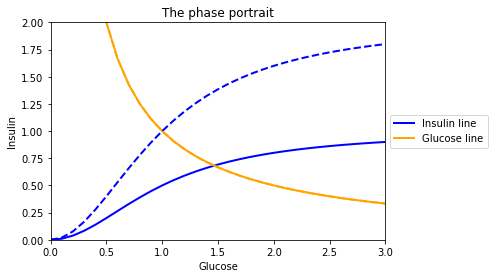

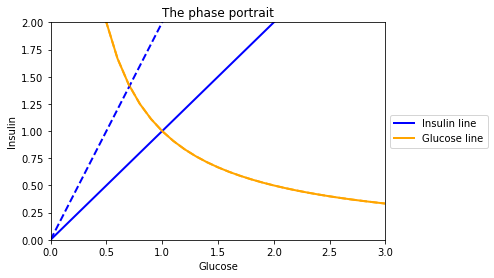

In [9]:
plot_GI_phase_portrait(glucose_line,insulin_line.subs(fG,hill_g),{gamma:1,m:1,B:1,q:1,s:1,k:1,n:2})
plot_GI_phase_portrait(glucose_line,insulin_line.subs(fG,hill_g),{gamma:1,m:1,B:1,q:2,s:1,k:1,n:2},ls='--')  ; plt.show()

plot_GI_phase_portrait(glucose_line,insulin_line.subs(fG,simple_g),{gamma:1,m:1,B:1,q:1,s:1,k:1,n:2})
plot_GI_phase_portrait(glucose_line,insulin_line.subs(fG,simple_g),{gamma:1,m:1,B:1,q:2,s:1,k:1,n:2},ls='--'); plt.show()

When we rise q (dashed line) the insulin line shifts upwards, glucose steady state decreases, and insulin steady state increases

This is in agreement with the steady state expression that we found in 1.d : $G_{st}$ ~ $\frac{1}{\sqrt{q}}$ , 
$I_{st}$ ~ $\sqrt{q}$

### Fill up values for the paramerers and observe the change in the lines and steady state:

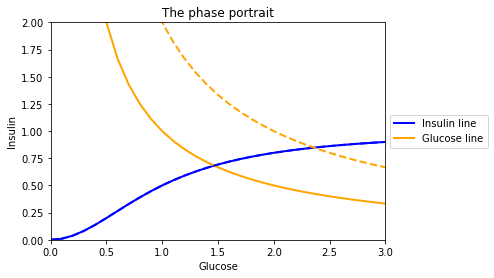

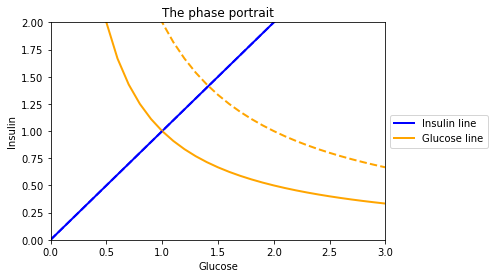

In [10]:
plot_GI_phase_portrait(glucose_line,insulin_line.subs(fG,hill_g),{gamma:1,m:1,B:1,q:1,s:1,k:1,n:2})
plot_GI_phase_portrait(glucose_line,insulin_line.subs(fG,hill_g),{gamma:1,m:1,B:1,q:1,s:0.5,k:1,n:2},ls='--')  ; plt.show()

plot_GI_phase_portrait(glucose_line,insulin_line.subs(fG,simple_g),{gamma:1,m:1,B:1,q:1,s:1,k:1,n:2})
plot_GI_phase_portrait(glucose_line,insulin_line.subs(fG,simple_g),{gamma:1,m:1,B:1,q:1,s:0.5,k:1,n:2},ls='--'); plt.show()

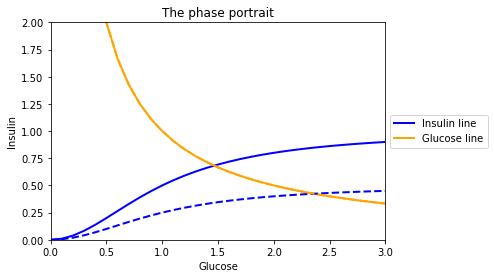

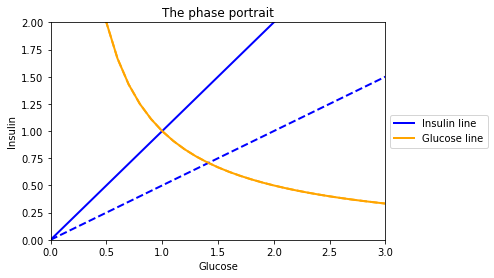

In [11]:
plot_GI_phase_portrait(glucose_line,insulin_line.subs(fG,hill_g),{gamma:1,m:1,B:1,q:1,s:1,k:1,n:2})
plot_GI_phase_portrait(glucose_line,insulin_line.subs(fG,hill_g),{gamma:2,m:1,B:1,q:1,s:1,k:1,n:2},ls='--')  ; plt.show()

plot_GI_phase_portrait(glucose_line,insulin_line.subs(fG,simple_g),{gamma:1,m:1,B:1,q:1,s:1,k:1,n:2})
plot_GI_phase_portrait(glucose_line,insulin_line.subs(fG,simple_g),{gamma:2,m:1,B:1,q:1,s:1,k:1,n:2},ls='--'); plt.show()

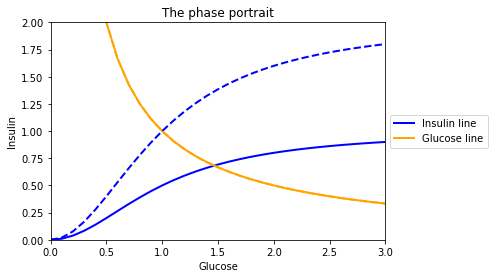

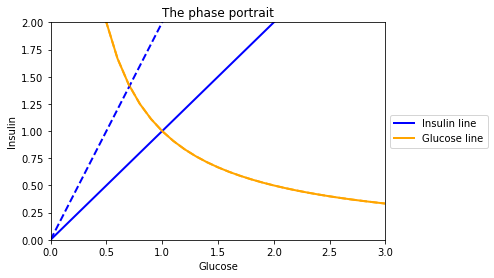

In [12]:
plot_GI_phase_portrait(glucose_line,insulin_line.subs(fG,hill_g),{gamma:1,m:1,B:1,q:1,s:1,k:1,n:2})
plot_GI_phase_portrait(glucose_line,insulin_line.subs(fG,hill_g),{gamma:1,m:1,B:2,q:1,s:1,k:1,n:2},ls='--')  ; plt.show()

plot_GI_phase_portrait(glucose_line,insulin_line.subs(fG,simple_g),{gamma:1,m:1,B:1,q:1,s:1,k:1,n:2})
plot_GI_phase_portrait(glucose_line,insulin_line.subs(fG,simple_g),{gamma:1,m:1,B:2,q:1,s:1,k:1,n:2},ls='--'); plt.show()